In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import decomposition
from scipy.spatial.distance import cdist
%matplotlib inline

df=pd.read_csv('EV_Data.csv')
df

,Age group?,Gender?,Occupation,Monthly household income?,How comfortable are you in adopting new technologies?,"How do you typically plan your day for activities like commuting, vehicle charging, and other tasks?",How far do you typically travel in a single trip on your bike?,How do you primarily envision using a bike in your daily life?,What type of vehicle do you currently own or primarily use?,How Satisfied are you with your current vehicle's performance?,...,"When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Durability]","When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Smooth and quiet ride]","When thinking about your ideal experience with an EV bike, how important are the following factors for you? [High performance (e.g., speed, acceleration)]","When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Comfort]","When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Maintenance cost]","When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Brand]",What are two words that comes to mind when you think of EV bikes in general?,What are two words that comes to mind when you think of HONDA in general?,What are two words that comes to mind when you think of Yamaha in general?,What is two word that comes to mind when you think of Suzuki in general?
0,1,1,1,3,5,1,1,Commuting to work or school;Leisure and entert...,1.0,1,...,3,3,3,3,3,3,No fuel,Comfort,Comfort,Moderate
1,1,0,1,3,5,2,3,Commuting to work or school;Leisure and entert...,2.0,2,...,5,5,5,5,5,5,Kaam chalao,"Civic, Sexy","Sports, R3","GS150, Sleek"
2,2,0,2,4,5,3,1,Leisure and entertainment,1.0,2,...,4,4,3,5,4,2,Environment Friendly,"Design, Power","Sporty, Reliable",Old school
3,2,1,3,5,5,2,3,Leisure and entertainment,1.0,1,...,3,5,5,5,5,5,Comfortably smooth,Monopolistic,Good bikes,Bad designer
4,2,1,3,3,5,2,3,Long-distance travel,1.0,1,...,5,5,4,4,5,1,Easy to drive,Long-term Investment,Question on its reliability,Best seller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,1,0,1,3,5,2,3,Commuting to work or school;Leisure and entert...,2.0,3,...,5,5,5,5,5,5,"Quiet, High-tech","Innovative, Reliable","Plain, Reliable","Reliable, Plain"
91,2,1,2,1,3,1,1,Commuting to work or school;Leisure and entert...,1.0,1,...,3,3,2,2,2,2,"Cost-effective, Smooth","Trustworthy, Fuel-efficient","Performance-oriented, Dependable","Underpowered, Trustworthy"
92,0,0,2,3,5,2,1,Commuting to work or school,1.0,1,...,5,5,5,5,5,5,"Sleek, Futuristic","Trustworthy, Plain","Underpowered, Robust","Conservative, Fuel-efficient"
93,1,0,1,3,5,2,3,Commuting to work or school;Leisure and entert...,2.0,3,...,5,5,5,5,5,5,"Rechargeable, High-tech","Plain, Reliable","Robust, Fuel-efficient","Robust, Performance-oriented"


In [ ]:
# S


for option in ['Fuel efficiency', 'Performance (acceleration, handling, etc.)', 'Maintenance cost', 'Comfort and design',
              'Reliability', 'Brand reputation', 'Environmental impact', 'After Sale Service', 'Resale Value']:
    df[option] = df['What do you like most about your current vehicle? (Select up to 3)'].str.contains(option).astype(int)

# Now, you have 9 new columns in your DataFrame, each representing one of the options
# and having a value of 1 if the option was selected and 0 otherwise.


<ipython-input-5-43d9a0823aeb>:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[option] = df['What do you like most about your current vehicle? (Select up to 3)'].str.contains(option).astype(int)


In [ ]:
# H



for option in ['Commuting to work or school','Leisure and entertainment','Family transportation','Running errands around town','Long-distance travel']:
    df[option] = df['How do you primarily envision using a bike in your daily life?'].str.contains(option).astype(int)

# Now, you have 9 new columns in your DataFrame, each representing one of the options
# and having a value of 1 if the option was selected and 0 otherwise.


In [ ]:
E = df['How comfortable are you in adopting new technologies?']
F = df['How do you typically plan your day for activities like commuting, vehicle charging, and other tasks?']
Q = df['How familiar are you with EV bikes? ']
J = df['How Satisfied are you with your current vehicle\'s performance?']
O = df['Would you consider replacing your current vehicle in the next 1-2 years?']
R = df['Have you ever considered purchasing or using an EV bike?']
T = df['Which of the following best describes your experience with electric bikes?']
H = df[['Commuting to work or school','Leisure and entertainment','Family transportation','Running errands around town','Long-distance travel']]

In [ ]:
cluster_cols = pd.concat([E,F,Q,J,O,R,T,H], axis=1)
cluster_cols

,How comfortable are you in adopting new technologies?,"How do you typically plan your day for activities like commuting, vehicle charging, and other tasks?",How familiar are you with EV bikes?,How Satisfied are you with your current vehicle's performance?,Would you consider replacing your current vehicle in the next 1-2 years?,Have you ever considered purchasing or using an EV bike?,Which of the following best describes your experience with electric bikes?,Commuting to work or school,Leisure and entertainment,Family transportation,Running errands around town,Long-distance travel
0,5,1,1,1,3,2,3,1,1,1,1,1
1,5,2,1,2,1,3,3,1,1,0,1,1
2,5,3,1,2,1,1,1,0,1,0,0,0
3,5,2,1,1,3,5,1,0,1,0,0,0
4,5,2,2,1,3,2,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
90,5,2,1,3,1,5,2,1,1,0,1,0
91,3,1,1,1,2,1,2,1,1,0,0,0
92,5,2,1,1,3,2,3,1,0,0,0,0
93,5,2,1,3,1,5,1,1,1,0,1,0


In [ ]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(cluster_cols)

KMeans(n_clusters=3, random_state=42)

In [ ]:
df['Cluster'] = model.predict(cluster_cols)

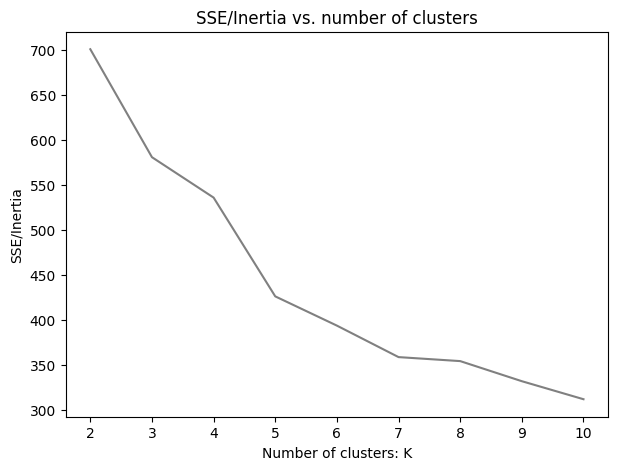

In [ ]:
X = cluster_cols

inertia_scores = []
for K in range(2,11):
    inertia = KMeans(n_clusters=K, random_state=42).fit(X)\
                                                    .inertia_
    inertia_scores.append(inertia)

plt.figure(figsize=[7,5])
plt.plot(range(2,11), inertia_scores, color='gray')
plt.title("SSE/Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('SSE/Inertia')
plt.show()

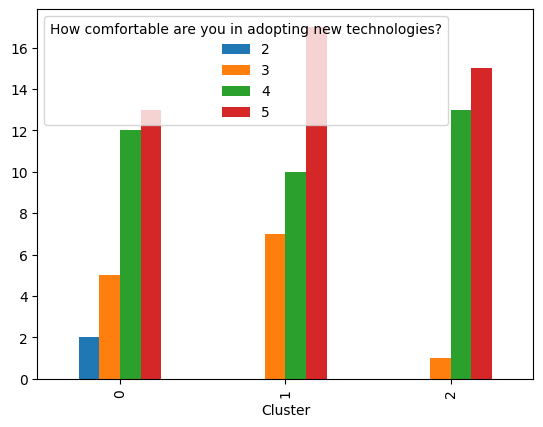

In [ ]:
pd.crosstab(df['Cluster'], df['How comfortable are you in adopting new technologies?']).plot.bar()
plt.show()

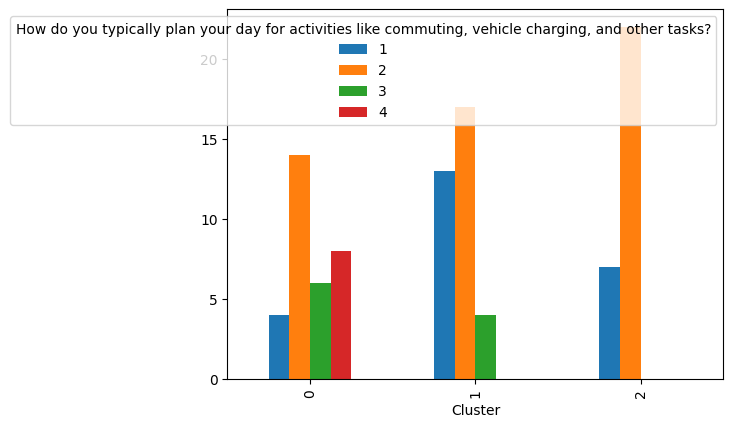

In [ ]:
pd.crosstab(df['Cluster'], df['How do you typically plan your day for activities like commuting, vehicle charging, and other tasks?']).plot.bar()
plt.show()

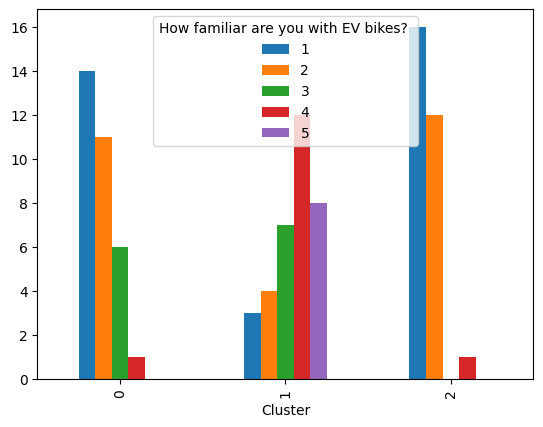

In [ ]:
pd.crosstab(df['Cluster'], df['How familiar are you with EV bikes? ']).plot.bar()
plt.show()

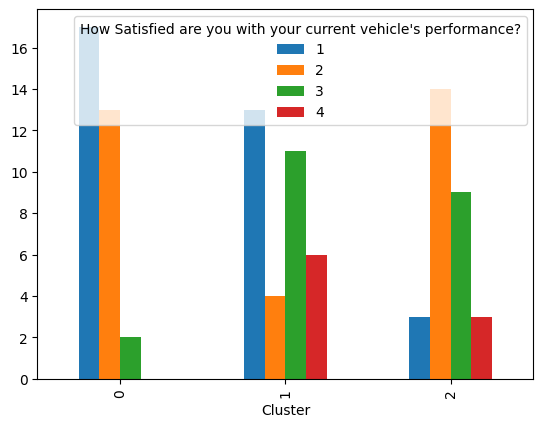

In [ ]:
pd.crosstab(df['Cluster'], df['How Satisfied are you with your current vehicle\'s performance?']).plot.bar()
plt.show()

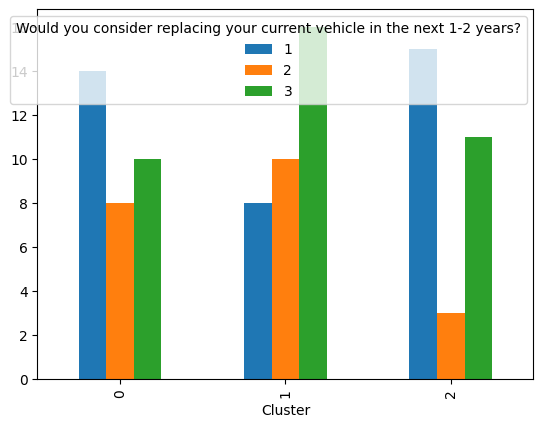

In [ ]:
pd.crosstab(df['Cluster'], df['Would you consider replacing your current vehicle in the next 1-2 years?']).plot.bar()
plt.show()

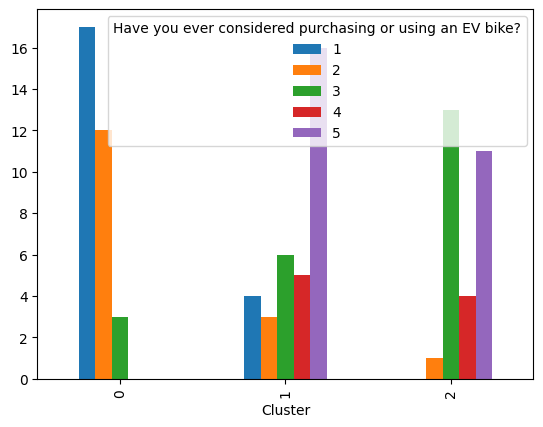

In [ ]:
pd.crosstab(df['Cluster'], df['Have you ever considered purchasing or using an EV bike?']).plot.bar()
plt.show()

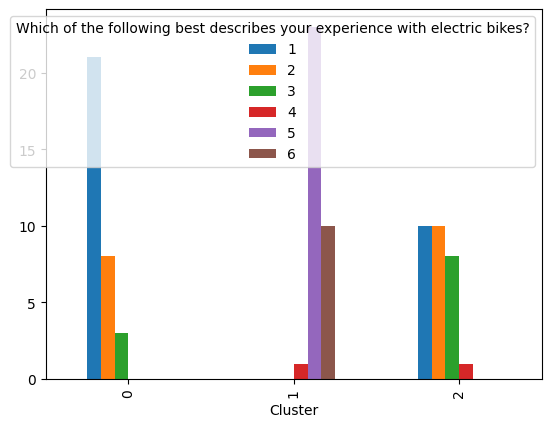

In [ ]:
pd.crosstab(df['Cluster'], df['Which of the following best describes your experience with electric bikes?']).plot.bar()
plt.show()

In [ ]:
df[['Commuting to work or school','Cluster']].describe()

,Commuting to work or school,Cluster
count,95.000000,95.000000
mean,0.694737,0.968421
std,0.462962,0.804940
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,2.000000
max,1.000000,2.000000


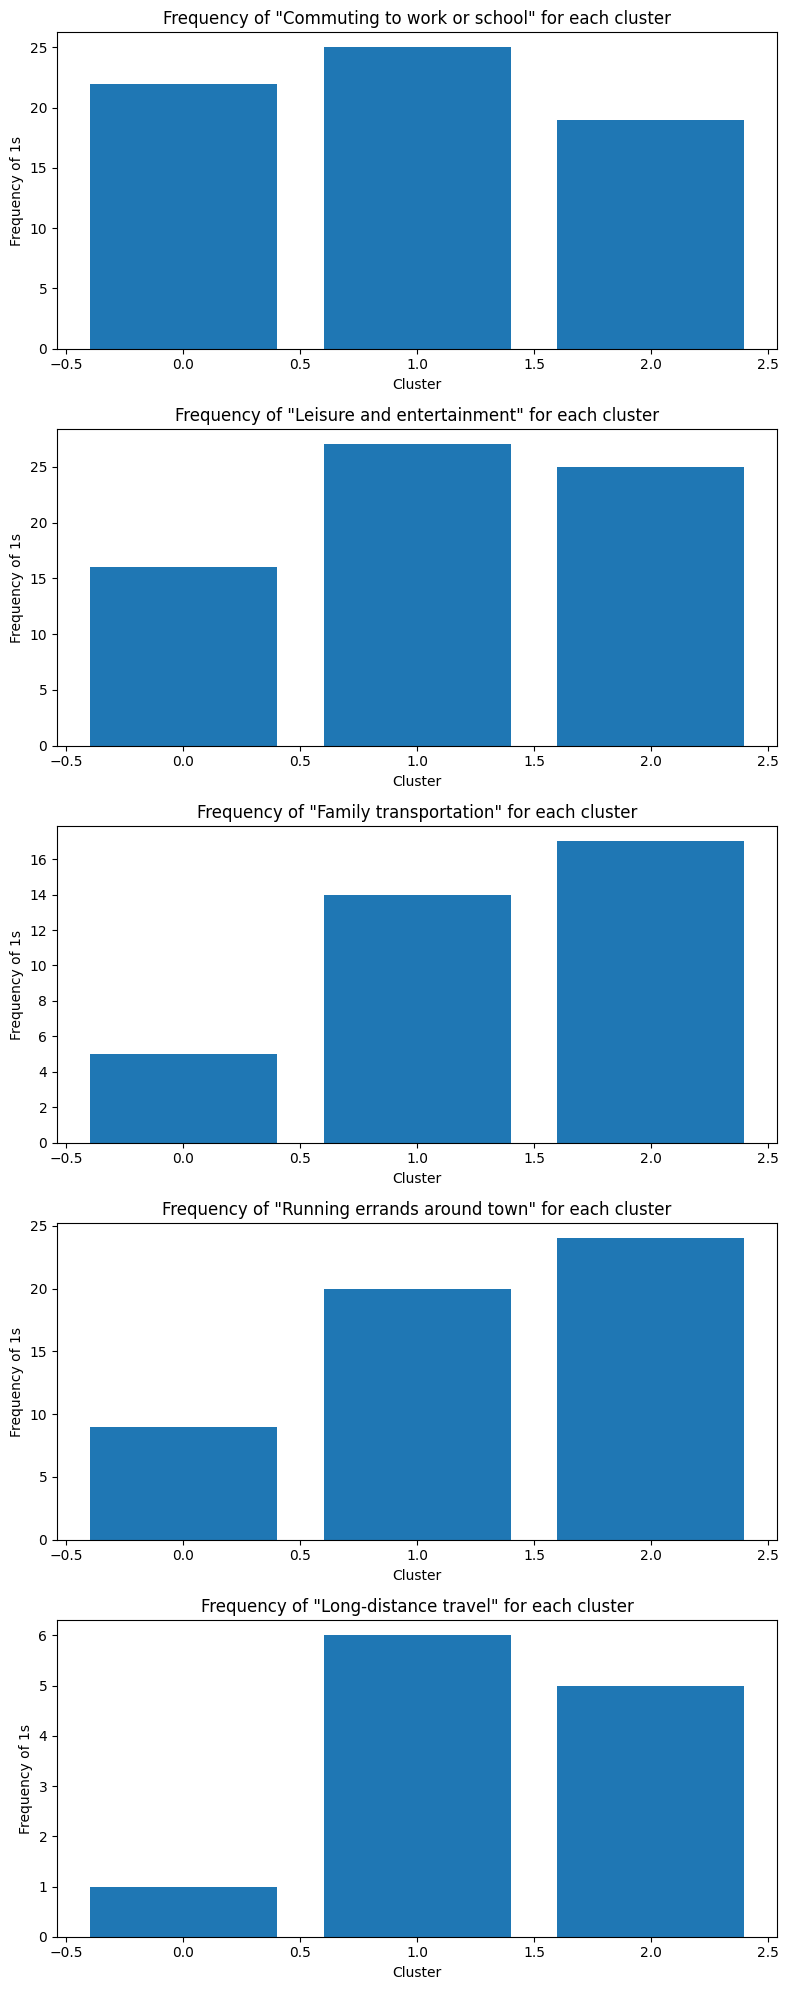

In [ ]:
# prompt: give me a graph showing the frequency of 1s for each of these 5 columns for each of the 3 clusters

# Assuming you want to plot the frequency of 1s for 'Fuel efficiency', 'Performance (acceleration, handling, etc.)',
# 'Maintenance cost', 'Comfort and design', 'Reliability' for each cluster.

selected_cols = ['Commuting to work or school','Leisure and entertainment','Family transportation','Running errands around town','Long-distance travel']

fig, axes = plt.subplots(nrows=len(selected_cols), ncols=1, figsize=(8, 20))

for i, col in enumerate(selected_cols):
    cluster_freq = df.groupby('Cluster')[col].sum()  # Sum of 1s for each cluster
    ax = axes[i]
    ax.bar(cluster_freq.index, cluster_freq.values)
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Frequency of 1s')
    ax.set_title(f'Frequency of "{col}" for each cluster')

plt.tight_layout()
plt.show()

<h1> Demographic Profiling</h1>

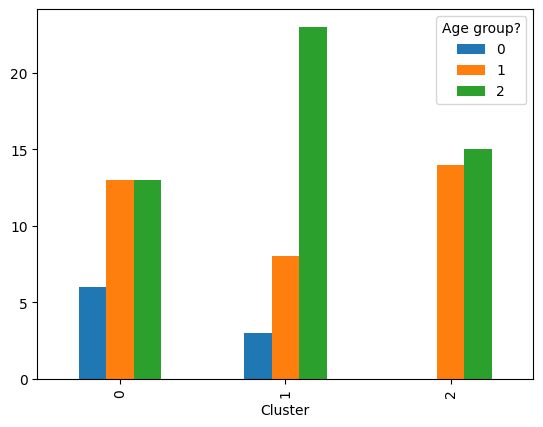

In [ ]:
pd.crosstab(df['Cluster'], df['Age group?']).plot.bar()
plt.show()

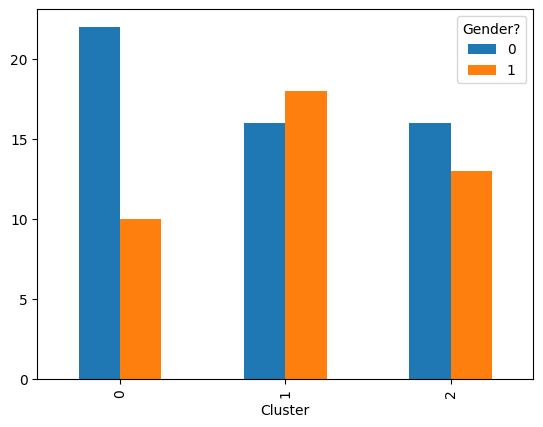

In [ ]:
pd.crosstab(df['Cluster'], df['Gender?']).plot.bar()
plt.show()

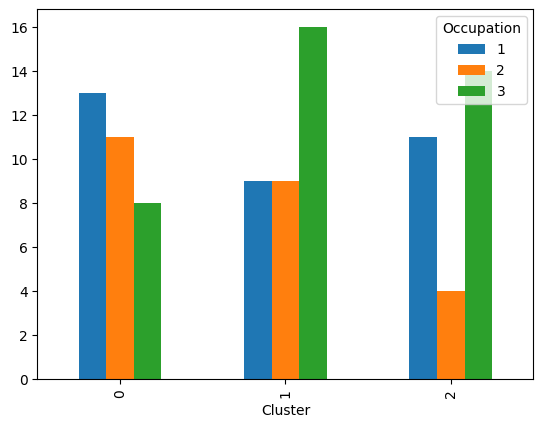

In [ ]:
pd.crosstab(df['Cluster'], df['Occupation']).plot.bar()
plt.show()

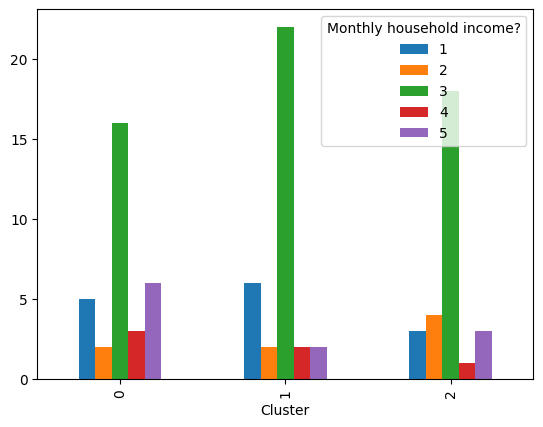

In [ ]:
pd.crosstab(df['Cluster'], df['Monthly household income?']).plot.bar()
plt.show()

In [ ]:
V = df['How important are following features in an EV bike to you? [Battery life/range]']
W = df['How important are following features in an EV bike to you? [Charging time]']
X = df['How important are following features in an EV bike to you? [Safety features (e.g., ABS, traction control)]']
Y = df['How important are following features in an EV bike to you? [Price]']
Z = df['How important are following features in an EV bike to you? [Design and aesthetics]']
AA = df['How important are following features in an EV bike to you? [Connectivity features (e.g., smart dashboard, app integration)]']
AB = df['When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Long range and fewer charges]']
AC = df['When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Durability]']
AD = df['When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Smooth and quiet ride]']
AE = df['When thinking about your ideal experience with an EV bike, how important are the following factors for you? [High performance (e.g., speed, acceleration)]']
AF = df['When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Comfort]']
AG = df['When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Maintenance cost]']
AH = df['When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Brand]']
E = df['How comfortable are you in adopting new technologies?']
F = df['How do you typically plan your day for activities like commuting, vehicle charging, and other tasks?']
Q = df['How familiar are you with EV bikes? ']
J = df['How Satisfied are you with your current vehicle\'s performance?']
O = df['Would you consider replacing your current vehicle in the next 1-2 years?']
R = df['Have you ever considered purchasing or using an EV bike?']
T = df['Which of the following best describes your experience with electric bikes?']
H = df[['Commuting to work or school','Leisure and entertainment','Family transportation','Running errands around town','Long-distance travel']]


In [ ]:
cluster_cols = pd.concat([V,W,X,Y,Z,AA,AB,AC,AD,AE,AF,AG,AH,E,F,Q,J,O,R,T,H], axis=1)
cluster_cols

,How important are following features in an EV bike to you? [Battery life/range],How important are following features in an EV bike to you? [Charging time],"How important are following features in an EV bike to you? [Safety features (e.g., ABS, traction control)]",How important are following features in an EV bike to you? [Price],How important are following features in an EV bike to you? [Design and aesthetics],"How important are following features in an EV bike to you? [Connectivity features (e.g., smart dashboard, app integration)]","When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Long range and fewer charges]","When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Durability]","When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Smooth and quiet ride]","When thinking about your ideal experience with an EV bike, how important are the following factors for you? [High performance (e.g., speed, acceleration)]",...,How familiar are you with EV bikes?,How Satisfied are you with your current vehicle's performance?,Would you consider replacing your current vehicle in the next 1-2 years?,Have you ever considered purchasing or using an EV bike?,Which of the following best describes your experience with electric bikes?,Commuting to work or school,Leisure and entertainment,Family transportation,Running errands around town,Long-distance travel
0,3,3,3,3,3,3,3,3,3,3,...,1,1,3,2,3,1,1,1,1,1
1,5,5,1,5,5,5,5,5,5,5,...,1,2,1,3,3,1,1,0,1,1
2,5,5,3,4,3,2,5,4,4,3,...,1,2,1,1,1,0,1,0,0,0
3,5,5,3,2,5,3,2,3,5,5,...,1,1,3,5,1,0,1,0,0,0
4,2,4,4,4,4,5,2,5,5,4,...,2,1,3,2,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,5,5,1,5,5,5,5,5,5,5,...,1,3,1,5,2,1,1,0,1,0
91,4,2,2,2,2,2,4,3,3,2,...,1,1,2,1,2,1,1,0,0,0
92,5,5,5,5,5,5,5,5,5,5,...,1,1,3,2,3,1,0,0,0,0
93,5,5,1,5,5,5,5,5,5,5,...,1,3,1,5,1,1,1,0,1,0


In [ ]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(cluster_cols)

KMeans(n_clusters=3, random_state=42)

In [ ]:
df['Cluster'] = model.predict(cluster_cols)

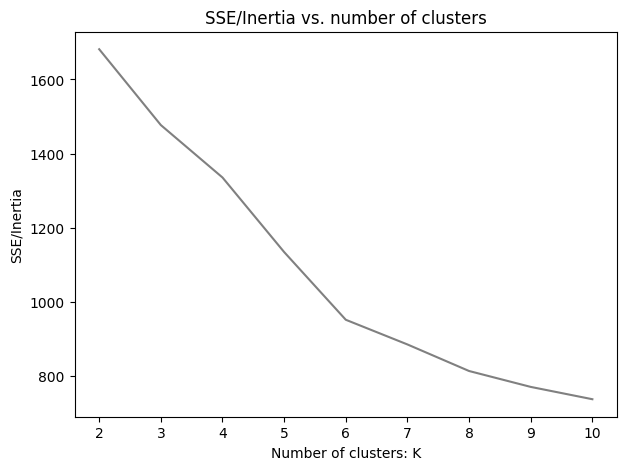

In [ ]:
X = cluster_cols

inertia_scores = []
for K in range(2,11):
    inertia = KMeans(n_clusters=K, random_state=42).fit(X)\
                                                    .inertia_
    inertia_scores.append(inertia)

plt.figure(figsize=[7,5])
plt.plot(range(2,11), inertia_scores, color='gray')
plt.title("SSE/Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('SSE/Inertia')
plt.show()

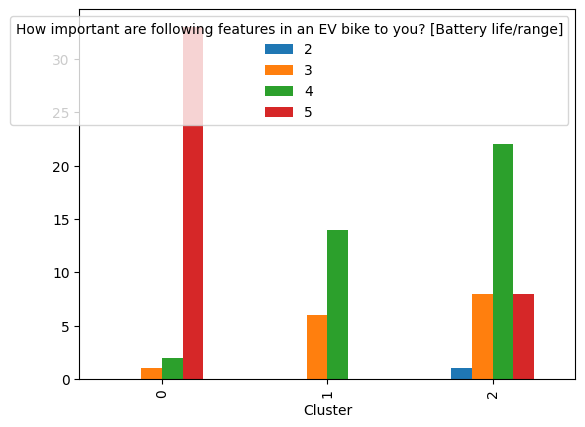

In [ ]:
pd.crosstab(df['Cluster'], df['How important are following features in an EV bike to you? [Battery life/range]']).plot.bar()
plt.show()

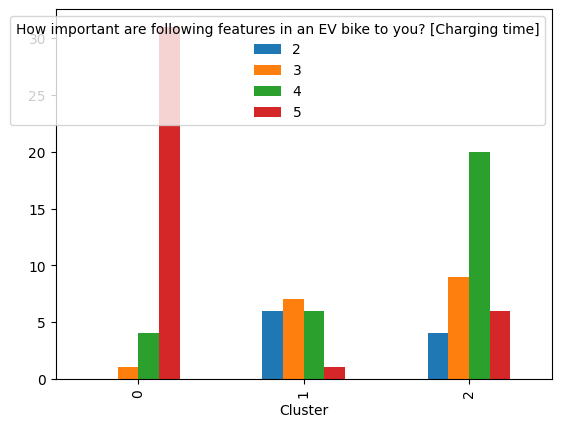

In [ ]:
pd.crosstab(df['Cluster'], df['How important are following features in an EV bike to you? [Charging time]']).plot.bar()
plt.show()

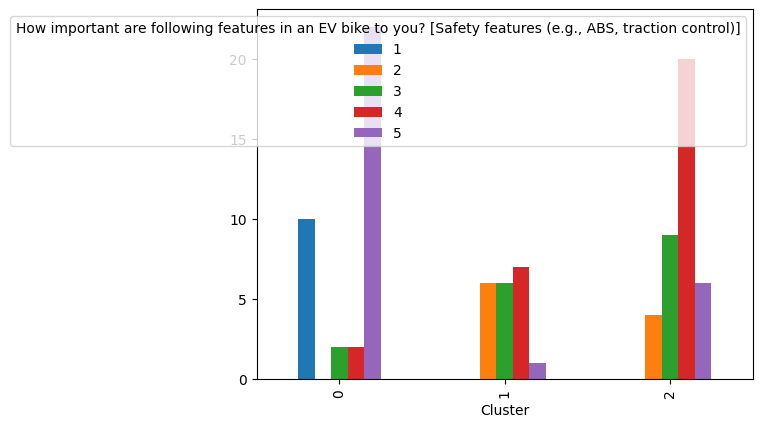

In [ ]:
pd.crosstab(df['Cluster'], df['How important are following features in an EV bike to you? [Safety features (e.g., ABS, traction control)]']).plot.bar()
plt.show()

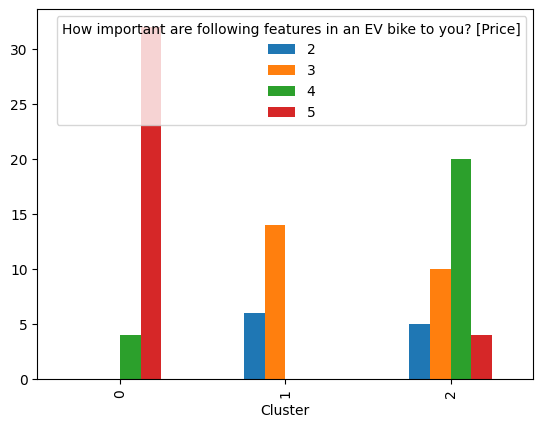

In [ ]:
pd.crosstab(df['Cluster'], df['How important are following features in an EV bike to you? [Price]']).plot.bar()
plt.show()

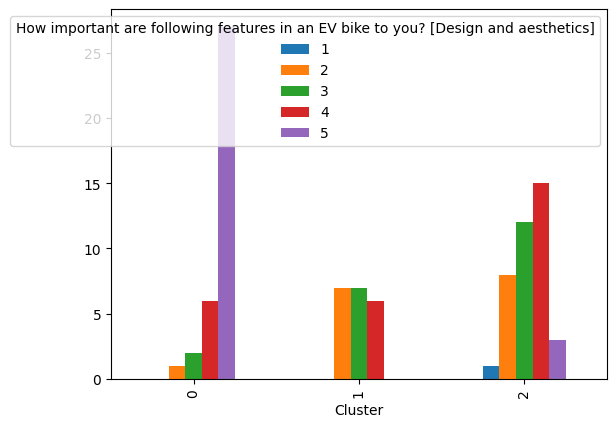

In [ ]:
pd.crosstab(df['Cluster'], df['How important are following features in an EV bike to you? [Design and aesthetics]']).plot.bar()
plt.show()

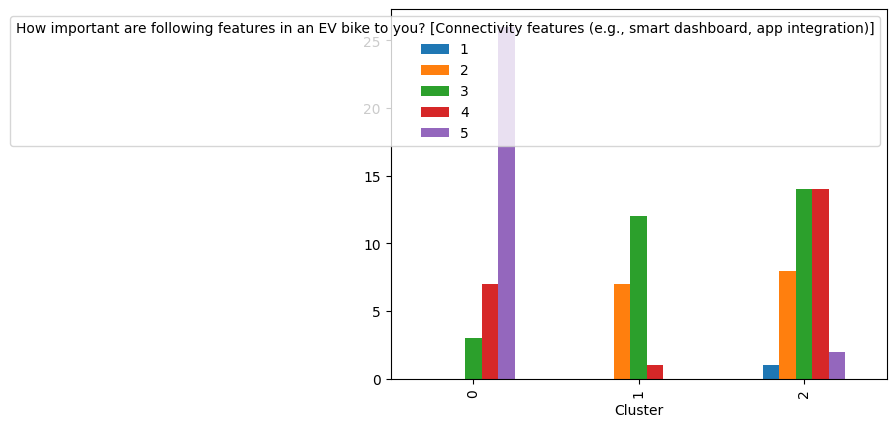

In [ ]:
pd.crosstab(df['Cluster'], df['How important are following features in an EV bike to you? [Connectivity features (e.g., smart dashboard, app integration)]']).plot.bar()
plt.show()

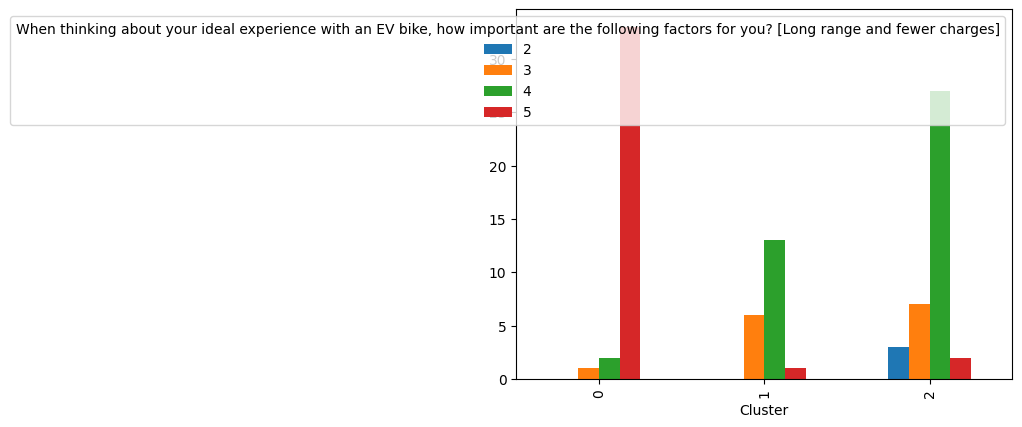

In [ ]:
pd.crosstab(df['Cluster'], df['When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Long range and fewer charges]']).plot.bar()
plt.show()

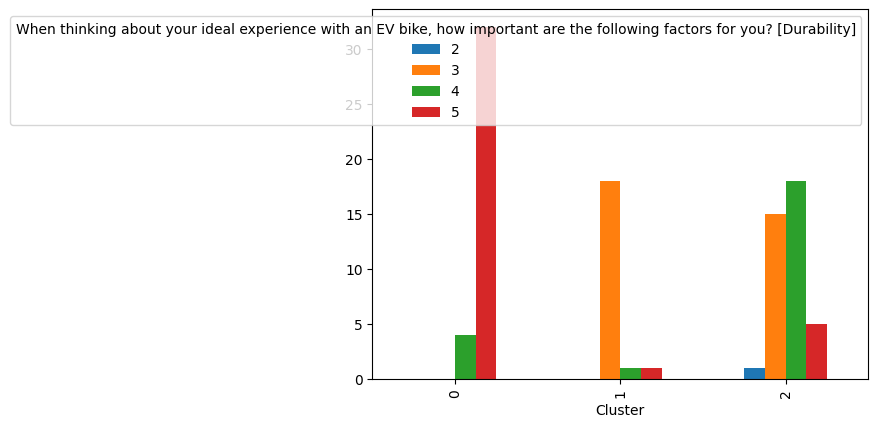

In [ ]:
pd.crosstab(df['Cluster'], df['When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Durability]']).plot.bar()
plt.show()

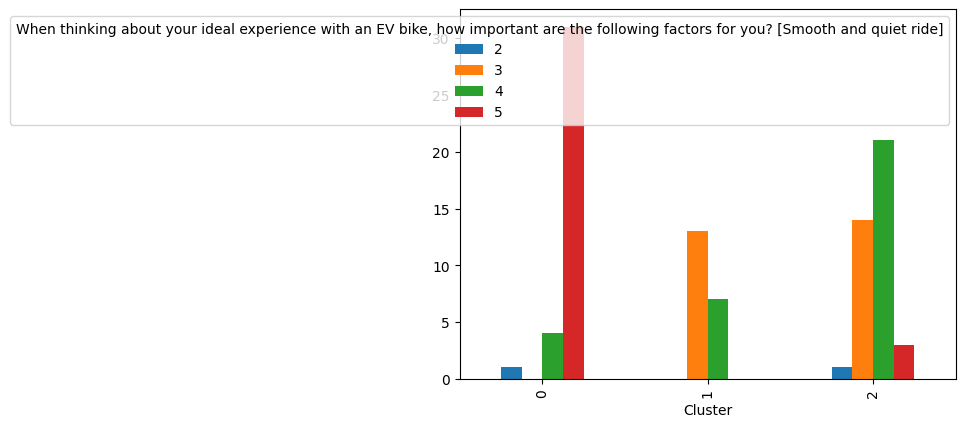

In [ ]:
pd.crosstab(df['Cluster'], df['When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Smooth and quiet ride]']).plot.bar()
plt.show()

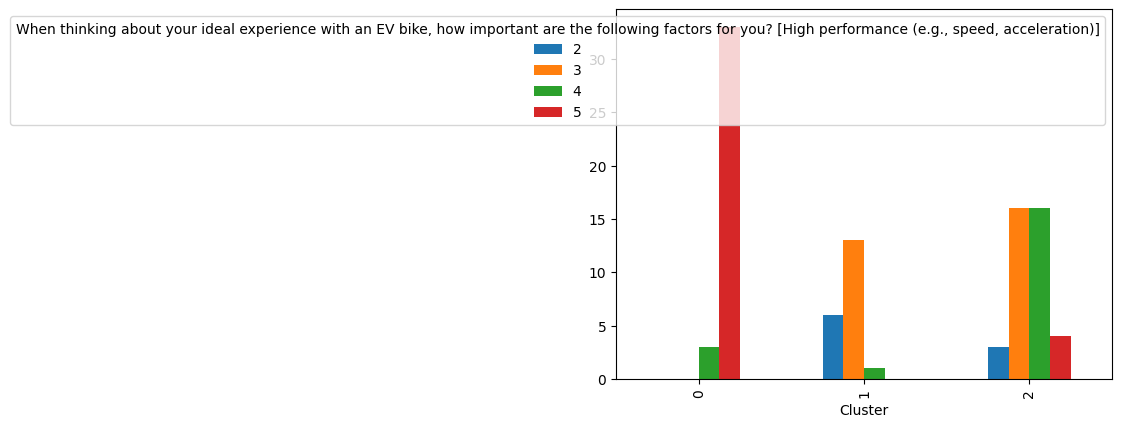

In [ ]:
pd.crosstab(df['Cluster'], df['When thinking about your ideal experience with an EV bike, how important are the following factors for you? [High performance (e.g., speed, acceleration)]']).plot.bar()
plt.show()

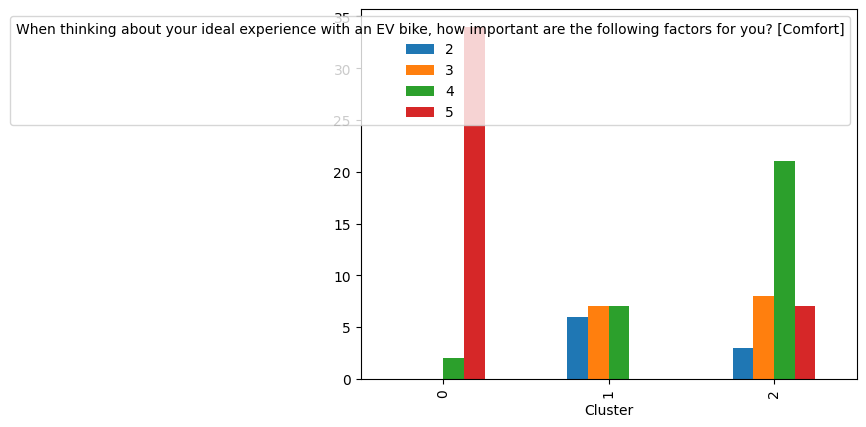

In [ ]:
pd.crosstab(df['Cluster'], df['When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Comfort]']).plot.bar()
plt.show()

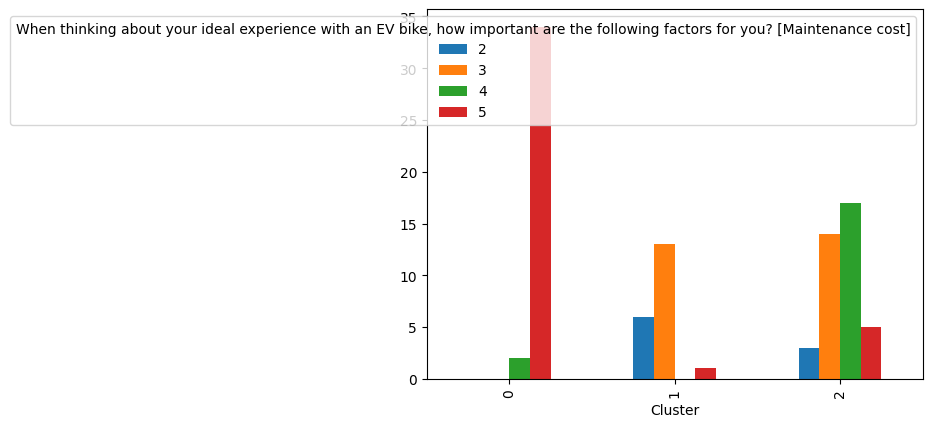

In [ ]:
pd.crosstab(df['Cluster'], df['When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Maintenance cost]']).plot.bar()
plt.show()

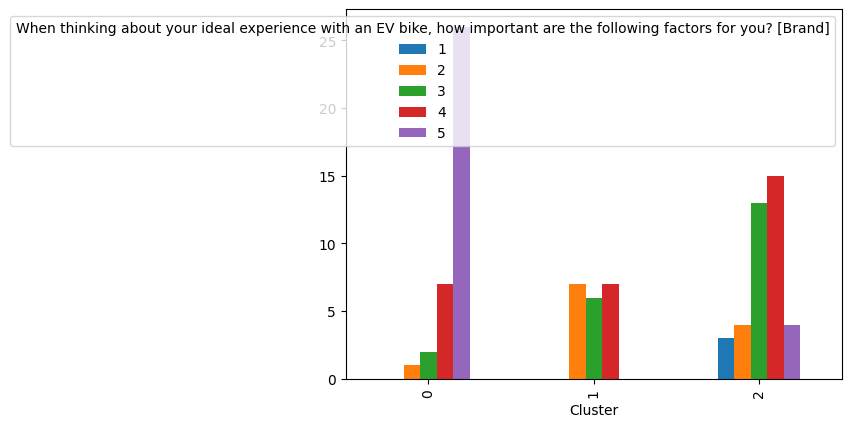

In [ ]:
pd.crosstab(df['Cluster'], df['When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Brand]']).plot.bar()
plt.show()

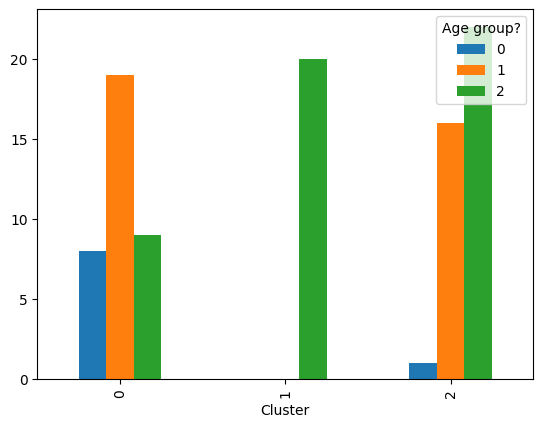

In [ ]:
pd.crosstab(df['Cluster'], df['Age group?']).plot.bar()
plt.show()

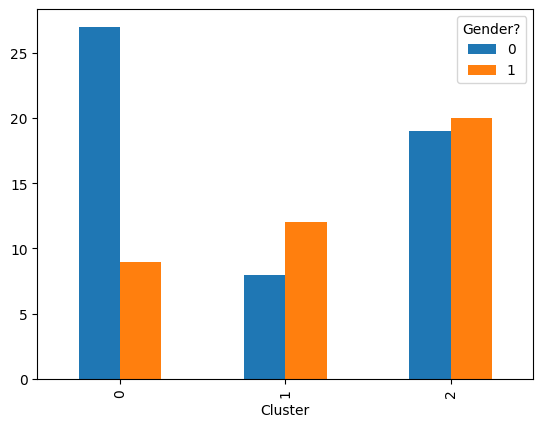

In [ ]:
pd.crosstab(df['Cluster'], df['Gender?']).plot.bar()
plt.show()

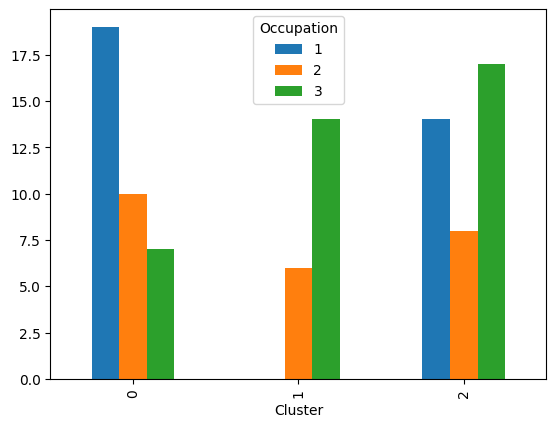

In [ ]:
pd.crosstab(df['Cluster'], df['Occupation']).plot.bar()
plt.show()

<ipython-input-16-7fa397cb49a3>:5: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


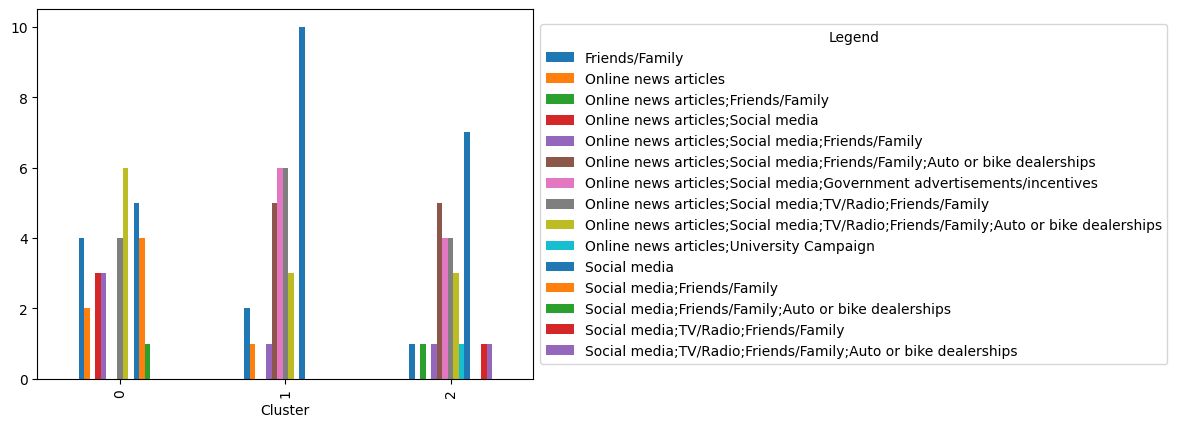

In [ ]:
plot = pd.crosstab(df['Cluster'], df['Where do you primarily get your information about EV bikes? (Select all that apply)']).plot
plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Legend")

plt.tight_layout()

plt.show()



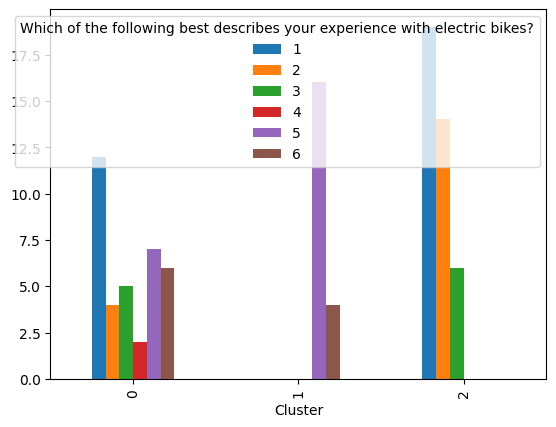

In [ ]:
pd.crosstab(df['Cluster'], df['Which of the following best describes your experience with electric bikes?']).plot.bar()
plt.show()



In [ ]:
from google.colab import files

# Save the DataFrame to a CSV file
df.to_csv('dataframe.csv', index=False)

# Download the CSV file
files.download('dataframe.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-52-9aee095000c4>:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(cluster_means.columns))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

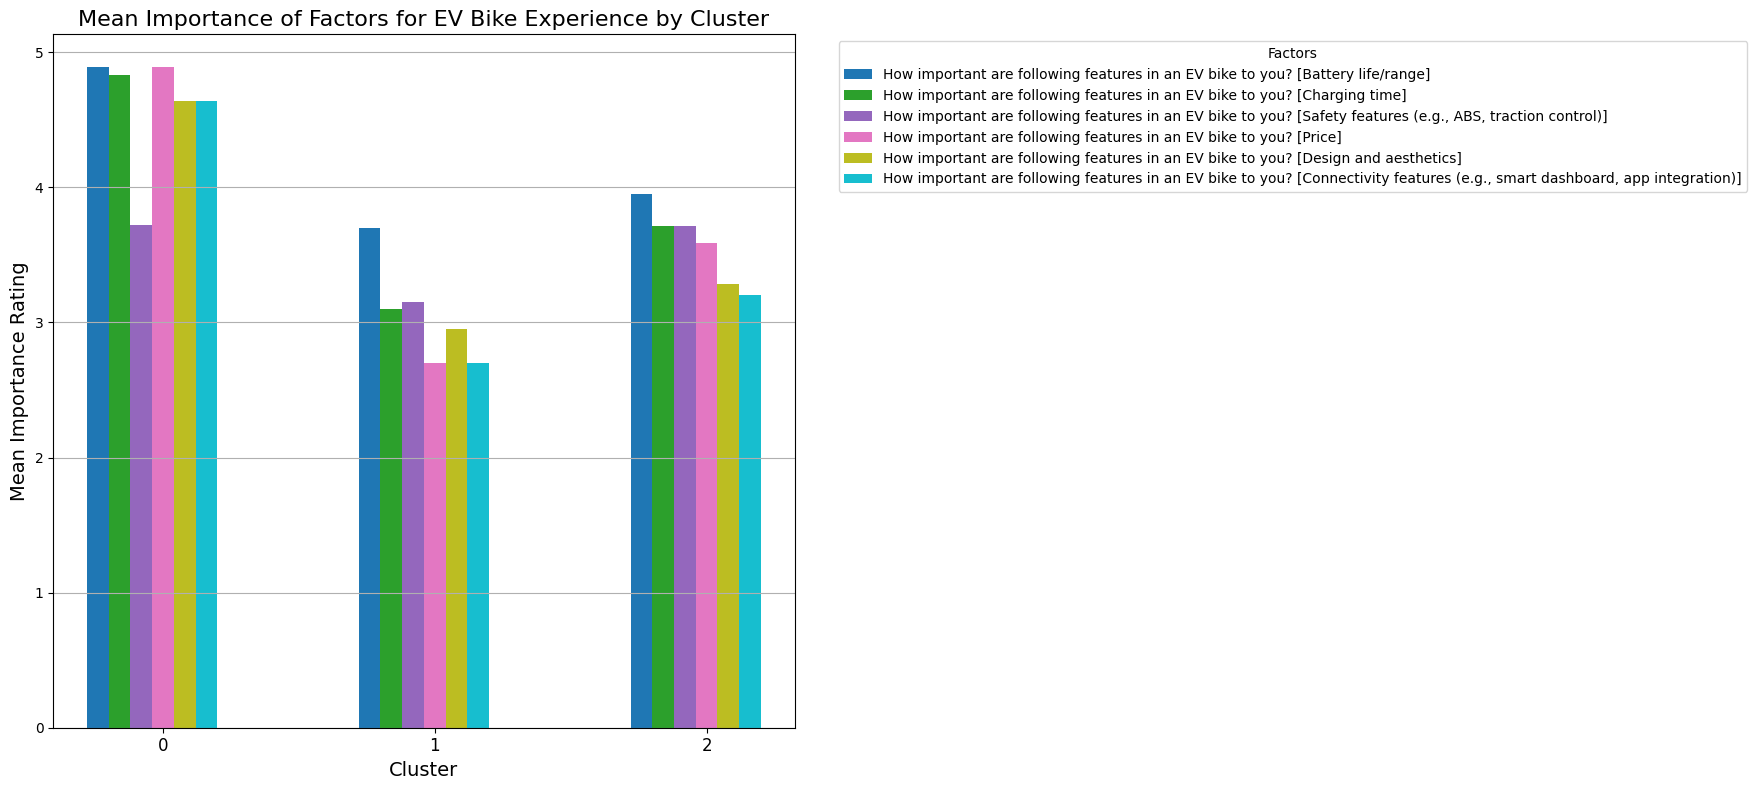

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Corrected relevant columns list
relevant_columns = [
    'How important are following features in an EV bike to you? [Battery life/range]',
    'How important are following features in an EV bike to you? [Charging time]',
    'How important are following features in an EV bike to you? [Safety features (e.g., ABS, traction control)]',
    'How important are following features in an EV bike to you? [Price]',
    'How important are following features in an EV bike to you? [Design and aesthetics]',
    'How important are following features in an EV bike to you? [Connectivity features (e.g., smart dashboard, app integration)]', # Corrected name
    'Cluster'
]

# Filtering the data to include only the relevant columns
cluster_data = df[relevant_columns]

# Calculating the mean values for each factor grouped by 'Cluster'
cluster_means = cluster_data.groupby('Cluster').mean()

# Plotting the bar chart with customization for better readability
fig, ax = plt.subplots(figsize=(18, 8))  # Increase the figure width for a broader chart

# Define colors for each factor
colors = plt.cm.get_cmap('tab10', len(cluster_means.columns))

# Bar width and position setup
bar_width = 0.08  # Narrower bar width to add more space between groups
index = np.arange(len(cluster_means))

# Plot each factor for each cluster
for i, column in enumerate(cluster_means.columns):
    ax.bar(index + i * bar_width, cluster_means[column], bar_width, label=column, color=colors(i))

# Setting labels, title, and ticks
ax.set_title('Mean Importance of Factors for EV Bike Experience by Cluster', fontsize=16)
ax.set_xlabel('Cluster', fontsize=14)
ax.set_ylabel('Mean Importance Rating', fontsize=14)
ax.set_xticks(index + bar_width * (len(cluster_means.columns) / 2))
ax.set_xticklabels(cluster_means.index, fontsize=12)
ax.legend(title='Factors', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Adding grid for better visual separation
ax.yaxis.grid(True)

# Layout adjustment for better fit
plt.tight_layout()

# Save the plot as an image file
plot_filename = 'mean_importance_factors_by_cluster.png'
plt.savefig(plot_filename)

# Download the file using Google Colab's files module
files.download(plot_filename)

# Show the plot
plt.show()

# Close the plot to release memory
plt.close()


In [ ]:
# Relevant columns for analysis
relevant_columns = [
    'How important are following features in an EV bike to you? [Battery life/range]']
    'How important are following features in an EV bike to you? [Charging time]']
    'How important are following features in an EV bike to you? [Safety features (e.g., ABS, traction control)]']
    'How important are following features in an EV bike to you? [Price]']
    'How important are following features in an EV bike to you? [Design and aesthetics]']
    'Cluster'
]

# Filtering the data to include only the relevant columns
cluster_data = df[relevant_columns]

# Calculating the mean values for each factor grouped by 'Cluster'
cluster_means = cluster_data.groupby('Cluster').mean()

# Plotting the bar chart with customization for better readability
fig, ax = plt.subplots(figsize=(20, 10))  # Increase the figure width for a broader chart

# Define colors for each factor using a colormap
colors = plt.cm.get_cmap('tab20', len(cluster_means.columns))

# Bar width and position setup
bar_width = 0.12  # Adjust bar width for better spacing
index = np.arange(len(cluster_means))

# Plot each factor for each cluster
for i, column in enumerate(cluster_means.columns):
    ax.bar(index + i * bar_width, cluster_means[column], bar_width, label=column, color=colors(i))

# Setting labels, title, and ticks
ax.set_title('Mean Importance of Factors for EV Bike Experience by Cluster', fontsize=18)
ax.set_xlabel('Cluster', fontsize=16)
ax.set_ylabel('Mean Importance Rating', fontsize=16)
ax.set_xticks(index + bar_width * (len(cluster_means.columns) / 2))
ax.set_xticklabels(cluster_means.index, fontsize=14)
ax.legend(title='Factors', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Adding grid for better visual separation
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Layout adjustment for better fit
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Relevant columns for analysis
relevant_columns = [
    'How important are following features in an EV bike to you? [Battery life/range]',
    'How important are following features in an EV bike to you? [Charging time]',
    'How important are following features in an EV bike to you? [Safety features (e.g., ABS, traction control)]',
    'How important are following features in an EV bike to you? [Price]',
    'How important are following features in an EV bike to you? [Design and aesthetics]',
    'How important are following features in an EV bike to you? [Connectivity features (e.g., smart dashboard, app integration)]'
]

# Calculating the mean values for each factor across all data
average_importance = df[relevant_columns].mean()

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 6))  # Set figure size

# Plotting the average ratings
average_importance.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)

# Setting labels, title, and ticks
ax.set_title('Average Importance of Features in an EV Bike', fontsize=16)
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Average Importance Rating', fontsize=14)
ax.set_xticklabels(average_importance.index, rotation=45, ha='right', fontsize=12)

# Adding grid for better visual separation
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Relevant columns for analysis
relevant_columns = [
    'When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Long range and fewer charges]',
    'When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Durability]',
    'When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Smooth and quiet ride]',
    'When thinking about your ideal experience with an EV bike, how important are the following factors for you? [High performance (e.g., speed, acceleration)]',
    'When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Comfort]',
    'When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Maintenance cost]',
    'When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Brand]'
]
# Calculating the mean values for each factor across all data
average_importance = df[relevant_columns].mean()

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 6))  # Set figure size

# Plotting the average ratings
average_importance.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)

# Setting labels, title, and ticks
ax.set_title('Average Importance of Features in an EV Bike', fontsize=16)
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Average Importance Rating', fontsize=14)
ax.set_xticklabels(average_importance.index, rotation=45, ha='right', fontsize=12)

# Adding grid for better visual separation
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# List of variables with their respective names for plotting
variables = [
    ('When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Long range and fewer charges]', 'Long range and fewer charges'),
    ('When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Durability]', 'Durability'),
    ('When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Smooth and quiet ride]', 'Smooth and quiet ride'),
    ('When thinking about your ideal experience with an EV bike, how important are the following factors for you? [High performance (e.g., speed, acceleration)]', 'High performance'),
    ('When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Comfort]', 'Comfort'),
    ('When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Maintenance cost]', 'Maintenance cost'),
    ('When thinking about your ideal experience with an EV bike, how important are the following factors for you? [Brand]', 'Brand')
]

# Loop through each variable to create, save, and download the plot
for col_name, label in variables:
    # Create the crosstab plot
    crosstab_plot = pd.crosstab(
        df['Cluster'],
        df[col_name]
    ).plot.bar()

    # Adjusting the title and labels
    plt.title(f"Importance of {label} for Ideal EV Bike Experience by Cluster", pad=20)
    plt.xlabel("Cluster")
    plt.ylabel("Count")

    # Move the legend outside the plot
    plt.legend(
        title="Importance Rating",
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )

    # Adjust layout to prevent label cut-off
    plt.tight_layout()

    # Save the plot as an image file
    plot_filename = f'{label.lower().replace(" ", "_")}_importance_by_cluster.png'
    crosstab_plot.figure.savefig(plot_filename)

    # Download the file using Google Colab's files module
    files.download(plot_filename)

    # Display the plot
    plt.show()

    # Close the plot to avoid overlap in the loop
    plt.close()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# List of variables with their respective names for plotting
features = [
    ('How important are following features in an EV bike to you? [Battery life/range]', 'Battery life and range'),
    ('How important are following features in an EV bike to you? [Charging time]', 'Charging time'),
    ('How important are following features in an EV bike to you? [Safety features (e.g., ABS, traction control)]', 'Safety features'),
    ('How important are following features in an EV bike to you? [Price]', 'Price'),
    ('How important are following features in an EV bike to you? [Design and aesthetics]', 'Design and aesthetics')
]

# Loop through each feature to create, save, and download the plot
for col_name, label in features:
    # Create the crosstab plot
    crosstab_plot = pd.crosstab(
        df['Cluster'],
        df[col_name]
    ).plot.bar()

    # Adjusting the title and labels
    plt.title(f"Importance of {label} in EV Bike by Cluster", pad=20)
    plt.xlabel("Cluster")
    plt.ylabel("Count")

    # Move the legend outside the plot
    plt.legend(
        title="Importance Rating",
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )

    # Adjust layout to prevent label cut-off
    plt.tight_layout()

    # Save the plot as an image file with a valid file name
    plot_filename = f'{label.lower().replace(" ", "_").replace("/", "_")}_importance_by_cluster.png'
    crosstab_plot.figure.savefig(plot_filename)

    # Download the file using Google Colab's files module
    files.download(plot_filename)

    # Display the plot
    plt.show()

    # Close the plot to avoid overlap in the loop
    plt.close()
